## [CIFAR10](https://pytorch.org/docs/stable/torchvision/datasets.html#cifar)

In [ ]:
import os
import random
import numpy as np
import torch
import torchvision

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [ ]:
dataset = torchvision.datasets.CIFAR10('./data', download=True)


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
print(type(dataset))

# tuple: (image, target)

<class 'torchvision.datasets.cifar.CIFAR10'>


In [ ]:
print(len(dataset))

50000


In [ ]:
n = 200
data, target = dataset[n]

In [ ]:
print(type(data))

<class 'PIL.Image.Image'>


In [ ]:
print(data.mode, data.width, data.height)

RGB 32 32


In [ ]:
print(type(target))

<class 'int'>


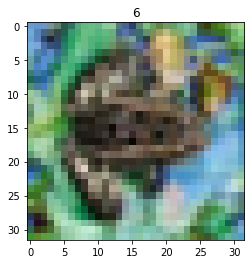

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data)
data.show()

In [ ]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
ToTensor = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.CIFAR10('./data', transform = ToTensor)

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])


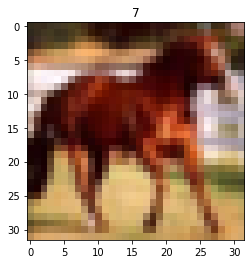

In [ ]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic)
    plt.show()
    break

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])


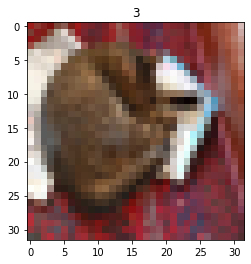

In [ ]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(pic)
    plt.show()
    break

In [ ]:
# 1000개 batch
n = 1000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 2000개 batch
n = 2000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 999개 batch
n = 999
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))

print(l)
print('Total number of data: {}'.format(i))

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Total number of data: 50000
[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
Total number of data: 50000
[999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 50]
Total number of data: 50000


In [ ]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [ ]:
import torchvision.transforms as transforms
compose_train = transforms.Compose([
                      transforms.RandomHorizontalFlip(),
                      transforms.RandomRotation(10),
                      transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                      transforms.ToTensor(),
                      transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                      ])
compose_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])


train_data = torchvision.datasets.CIFAR10(root='./data/', train='True', transform=compose_train, download=True)
test_data  = torchvision.datasets.CIFAR10(root='./data/', train='False', transform=compose_test, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 50000
test sets: 50000


In [ ]:
BATCH_SIZE = 10

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [ ]:
class CIFAR10Model(nn.Module):
    def __init__(self, output_size):
        super(CIFAR10Model, self).__init__()

        self.c1 = nn.Conv2d(3, 32, kernel_size=3)
        self.c2 = nn.Conv2d(32, 32, kernel_size=3)
        self.c3 = nn.Conv2d(32, 64, kernel_size=3)
        self.c4 = nn.Conv2d(64, 64, kernel_size=3) 
        self.c5 = nn.Conv2d(64, 128, kernel_size=3)
        self.c6 = nn.Conv2d(128, 128, kernel_size=3) 

        nn.init.kaiming_normal_(self.c1.weight)
        nn.init.kaiming_normal_(self.c2.weight)
        nn.init.kaiming_normal_(self.c3.weight)
        nn.init.kaiming_normal_(self.c4.weight)
        nn.init.kaiming_normal_(self.c5.weight)
        nn.init.kaiming_normal_(self.c6.weight)
        
        self.cv = nn.Sequential(
                self.c1,            # (n, 32, 30, 30)
                nn.ELU(),
                nn.BatchNorm2d(32),
                self.c2,            # (n, 32, 28, 28)
                nn.ELU(),
                nn.BatchNorm2d(32),
                nn.MaxPool2d(2),    # (n, 32, 14, 14)
                nn.Dropout(0.2),

                self.c3,            # (n, 64, 12, 12)
                nn.ELU(),
                nn.BatchNorm2d(64),
                self.c4,            # (n, 64, 10, 10)
                nn.ELU(),
                nn.BatchNorm2d(64),
                nn.MaxPool2d(2),    # (n, 64, 5, 5)
                nn.Dropout(0.3),

                self.c5,            # (n, 128, 3, 3)
                nn.ELU(),
                nn.BatchNorm2d(128),
                self.c6,            # (n, 128, 1, 1)
                nn.ELU(),
                nn.BatchNorm2d(128),
                nn.Dropout(0.4)
       )

        self.l1 = nn.Linear(128*1*1, output_size)
        nn.init.kaiming_normal_(self.l1.weight)

        self.fc = nn.Sequential(self.l1,
                        nn.BatchNorm1d(output_size),
                    )        

    def forward(self, x):
        x = self.cv(x)
        x = x.view(-1, 128*1*1)
        output = self.fc(x)
        value = torch.max(output, 1)[1]
        return output, value

In [ ]:
model = CIFAR10Model(10).to(device)

In [ ]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y, _ = model(data)
    print(y)
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([10, 3, 32, 32])
tensor([[-2.3898, -1.0030,  1.3661, -1.9101, -0.3650, -0.2685, -1.2802,  0.7734,
          0.2395,  1.4485],
        [-0.9688,  0.2762, -1.6013,  0.4958,  0.6604, -0.1505,  0.7300, -1.8539,
         -0.9628, -0.6505],
        [ 1.1719, -1.1121, -0.6607, -0.4753, -0.2854, -0.0212, -0.7472, -0.2686,
          0.0412,  0.0069],
        [-0.2103, -0.3553, -0.3024,  0.7242,  0.1416, -0.5486, -0.0139, -0.5720,
          0.0074,  0.3908],
        [ 0.0353,  0.3177, -1.1913, -0.8511, -1.0286, -0.9508,  0.7139,  0.9965,
          0.8042,  0.5116],
        [ 0.5975,  1.1620,  0.5658,  0.4227,  0.2908,  0.6048, -0.3747,  0.7171,
         -0.7420, -1.1175],
        [ 0.2488, -1.0952, -0.4199, -1.1076,  1.8226, -0.3001, -0.9748,  1.7898,
         -0.8639,  0.0396],
        [ 1.1754,  1.6926,  0.3563,  1.3336,  0.1705,  1.8573,  1.1659, -0.4579,
          1.6043,  1.0195],
        [-0.0212,  1.0667,  1.7241,  1.1897,  0.6833, -1.6554, -1.0247, -0.4814,
          1.4341,  

In [ ]:
BATCH_SIZE = 1000

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [ ]:
model = CIFAR10Model(10).to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 50 # 50회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y, _ = model(train_data)
        loss = criterion(y, train_target).sum()
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1
        del train_data
        del train_target

    if (epoch + 1) % 5 != 0:
        print('epoch {}th training loss: {}'.format(
                epoch + 1, train_loss / n_train
            ))
    else:        
        model.eval()
        n_test = 0
        test_loss = 0
        correct = 0
        total = 0
        for test_data, test_target in test_loader:
            test_data = test_data.to(device)
            test_target = test_target.to(device)
            y_pred, idx_pred = model(test_data)
            del test_data
            loss = criterion(y_pred, test_target).sum()
            test_loss += loss.data.cpu().numpy()
            n_test += 1
            total += len(test_target)
            correct += (idx_pred == test_target).sum()

        accuracy = correct * 100 / total
        print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
                epoch + 1, train_loss / n_train, test_loss / n_test,
                accuracy
            ))
        list_training_loss.append(train_loss / n_train)
        list_test_loss.append(test_loss / n_test)

epoch 1th training loss: 1.689858317375183
epoch 2th training loss: 1.3139809942245484
epoch 3th training loss: 1.1503094458580017
epoch 4th training loss: 1.052449336051941
epoch 5th training loss: 0.9776411747932434 test loss: 0.8101507079601288, accuracy: 71.1780014038086
epoch 6th training loss: 0.9104684460163116
epoch 7th training loss: 0.8677591180801392
epoch 8th training loss: 0.8300953245162964
epoch 9th training loss: 0.8032677841186523
epoch 10th training loss: 0.7749152040481567 test loss: 0.5521310901641846, accuracy: 80.76599884033203
epoch 11th training loss: 0.7541383218765259
epoch 12th training loss: 0.7399093949794769
epoch 13th training loss: 0.7243000793457032
epoch 14th training loss: 0.7023410046100617
epoch 15th training loss: 0.6938617718219757 test loss: 0.4807044553756714, accuracy: 83.04399871826172
epoch 16th training loss: 0.6780868697166443
epoch 17th training loss: 0.6697656178474426
epoch 18th training loss: 0.656739319562912
epoch 19th training loss: 

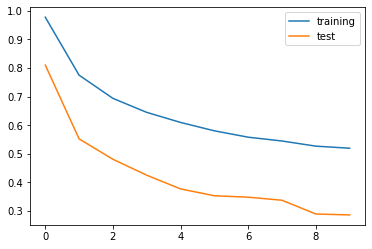

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

model.eval()
y_test = None
y_pred = None
for test_data, test_target in test_loader:
    test_data = test_data.to(device)
    test_target = test_target.to(device)
    _, y = model(test_data)
    del test_data
    if None == y_test:
        y_test = test_target
    else:
        torch.cat([y_test, test_target], dim=0)
    if None == y_pred:
        y_pred = y
    else:
        torch.cat([y_pred, y], dim=0)

score = accuracy_score(y_test.cpu(), y_pred.cpu())
print(score)

0.9
